Aluno: Matheus Graça Lira

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train_futebol.csv to train_futebol.csv


In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ler o arquivo CSV
data = pd.read_csv("train_futebol.csv")

# Exibindo minhas primeiras linhas para garantir que o CSV foi lido corretamente
print(data.head())

# Pré-processamento de dados

# 1. Codificação das colunas categóricas "Home" e "Away"
label_encoder = LabelEncoder()
data['Home'] = label_encoder.fit_transform(data['Home'])
data['Away'] = label_encoder.fit_transform(data['Away'])

# 2. Transformação da coluna "WIN" em uma variável numérica
win_mapping = {'Home': 1, 'Away': 2, 'Draw': 0}
data['WIN'] = data['WIN'].map(win_mapping)

# Exibir as primeiras linhas após a transformação
print("\nDados após pré-processamento:")
print(data.head())

# 3. Separar as features (X) e a variável-alvo (y)
X = data.drop(columns=['WIN', 'Date', 'Time', 'evento'])  # Remover colunas irrelevantes
y = data['WIN']

# 4. Dividir o conjunto de dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalonar as variáveis numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar as dimensões dos dados após escalonamento
print(f"\nDimensões de X_train: {X_train_scaled.shape}")
print(f"Dimensões de X_test: {X_test_scaled.shape}")


         Home      Away  Round        Date   Time   WIN  minuto       evento  \
0  Birmingham  West Ham     38  11.05.2003  16:00  Draw      27  Yellow_Away   
1  Birmingham  West Ham     38  11.05.2003  16:00  Draw      57  Yellow_Home   
2  Birmingham  West Ham     38  11.05.2003  16:00  Draw      66    Goal_Away   
3  Birmingham  West Ham     38  11.05.2003  16:00  Draw      80    Goal_Home   
4  Birmingham  West Ham     38  11.05.2003  16:00  Draw      88    Goal_Home   

   Yellow_Away  Yellow_Home  Goal_Away  Goal_Home  Red_Card_Away  \
0            1            0          0          0              0   
1            1            1          0          0              0   
2            1            1          1          0              0   
3            1            1          1          1              0   
4            1            1          1          2              0   

   Red_Card_Home  Own_Home  Own_Away  Penalty_Missed_Home  \
0              0         0         0             

Acurácia: 0.7947


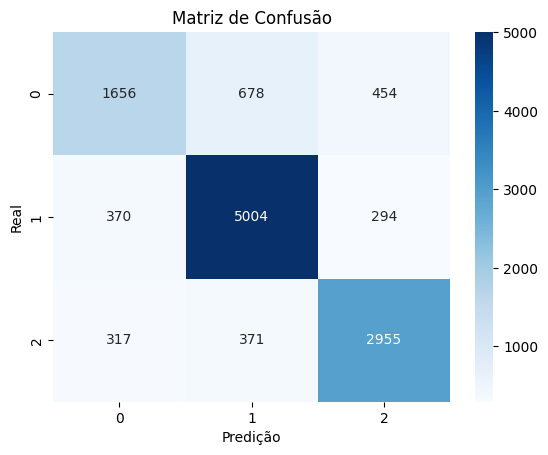


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.59      0.65      2788
           1       0.83      0.88      0.85      5668
           2       0.80      0.81      0.80      3643

    accuracy                           0.79     12099
   macro avg       0.78      0.76      0.77     12099
weighted avg       0.79      0.79      0.79     12099

AUC-ROC: 0.9247


In [ ]:
# Importar bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados de treino
rf_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test_scaled)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Relatório de classificação (precisão, recall, f1-score)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# AUC ROC Score (para binário)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled), multi_class='ovr')
print(f"AUC-ROC: {roc_auc:.4f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo
rf_model = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros para ajuste
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [10, 20, 30],        # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de amostras em um nó folha
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Ajustar o modelo com os dados de treino
grid_search.fit(X_train_scaled, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões usando o melhor modelo
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_scaled)

# Avaliar a acurácia do modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Acurácia do melhor modelo: {accuracy_best:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros encontrados: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia do melhor modelo: 0.7951


Resumo das etapas realizadas:

Treinamento inicial do Random Forest com parâmetros padrão, que obteve uma acurácia de 79,47%.

Ajuste de hiperparâmetros utilizando GridSearchCV, com os melhores parâmetros encontrados sendo:

**max_depth**: 30

**min_samples_leaf**: 1

**min_samples_split**: 2

**n_estimators**: 100


**Resultado final**: A acurácia após o ajuste de hiperparâmetros foi de 79,51%, representando uma leve melhoria.

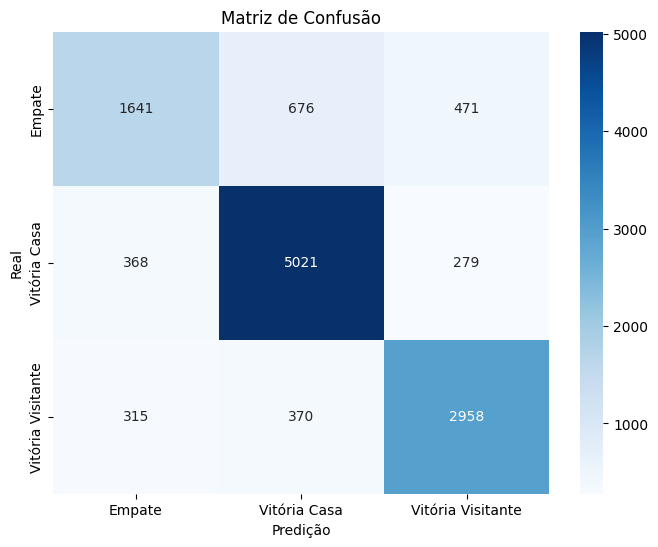

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_best)

# Plotar a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Empate', 'Vitória Casa', 'Vitória Visitante'], yticklabels=['Empate', 'Vitória Casa', 'Vitória Visitante'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


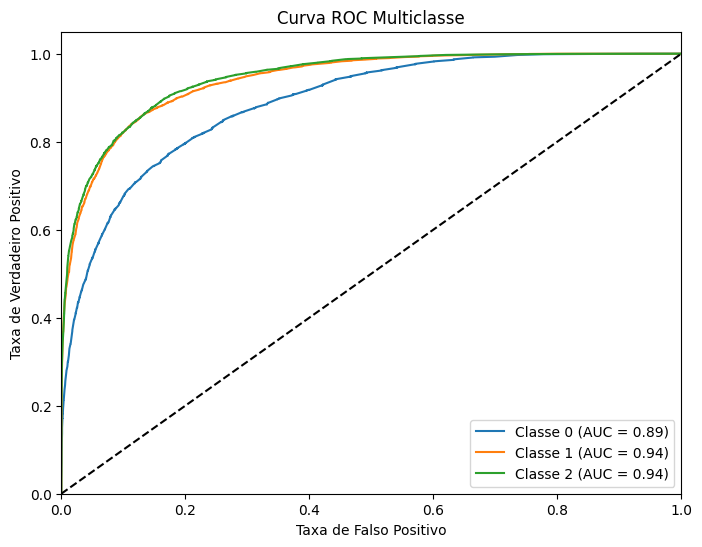

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar as classes para calcular a ROC multiclasse
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_best = best_rf_model.predict_proba(X_test_scaled)

# Plotar a Curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC Multiclasse')
plt.legend(loc='lower right')
plt.show()


Testando em outro modelo
- XG BOOST: Esse modelo é conhecido por sua alta performance em competições de machine learning. Ele é baseado em boosting, onde várias árvores são combinadas para reduzir o erro.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo
xgb_model = XGBClassifier(random_state=42)

# Definir os hiperparâmetros para ajuste
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Número de árvores
    'max_depth': [3, 6, 10],          # Profundidade máxima das árvores
    'learning_rate': [0.01, 0.1, 0.3], # Taxa de aprendizado
    'subsample': [0.7, 1.0],          # Amostra das instâncias de treino
    'colsample_bytree': [0.7, 1.0]    # Amostra das features para cada árvore
}

# Configurar o GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Ajustar o modelo
grid_search_xgb.fit(X_train_scaled, y_train)

# Fazer previsões e avaliar o desempenho
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do melhor modelo XGBoost: {accuracy_xgb:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Acurácia do melhor modelo XGBoost: 0.8788


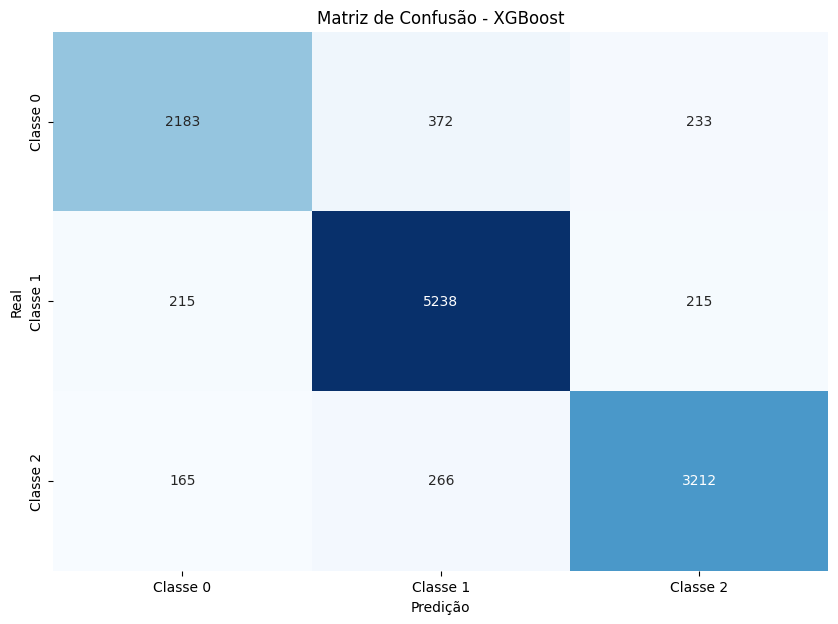

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      2788
           1       0.89      0.92      0.91      5668
           2       0.88      0.88      0.88      3643

    accuracy                           0.88     12099
   macro avg       0.87      0.86      0.87     12099
weighted avg       0.88      0.88      0.88     12099



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Gerar a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Configurar o gráfico
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Imprimir o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))


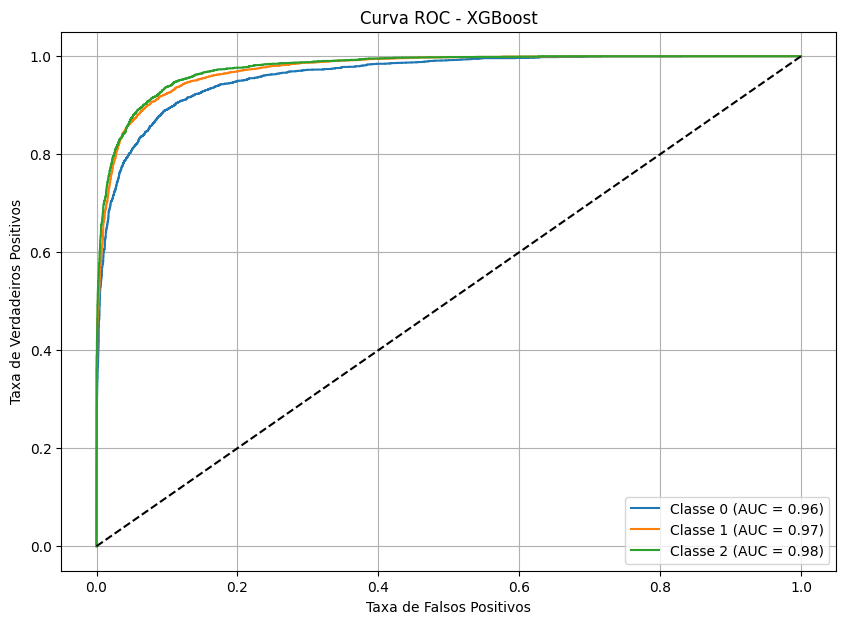

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obter as previsões de probabilidade
y_prob_xgb = best_xgb_model.predict_proba(X_test_scaled)

# Configurar o gráfico
plt.figure(figsize=(10, 7))
for i in range(len(set(y_test))):
    fpr, tpr, _ = roc_curve(y_test, y_prob_xgb[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - XGBoost')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia nos conjuntos de treinamento e teste
train_accuracy = accuracy_score(y_train, best_xgb_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"Acurácia no conjunto de treinamento: {train_accuracy:.4f}")
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.8788


In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validação cruzada
cv_scores = cross_val_score(best_xgb_model, X_train_scaled, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {cv_scores.mean():.4f}")


Acurácia média com validação cruzada: 0.8501


Acurácia no conjunto de teste: 0.8788

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      2788
           1       0.89      0.92      0.91      5668
           2       0.88      0.88      0.88      3643

    accuracy                           0.88     12099
   macro avg       0.87      0.86      0.87     12099
weighted avg       0.88      0.88      0.88     12099



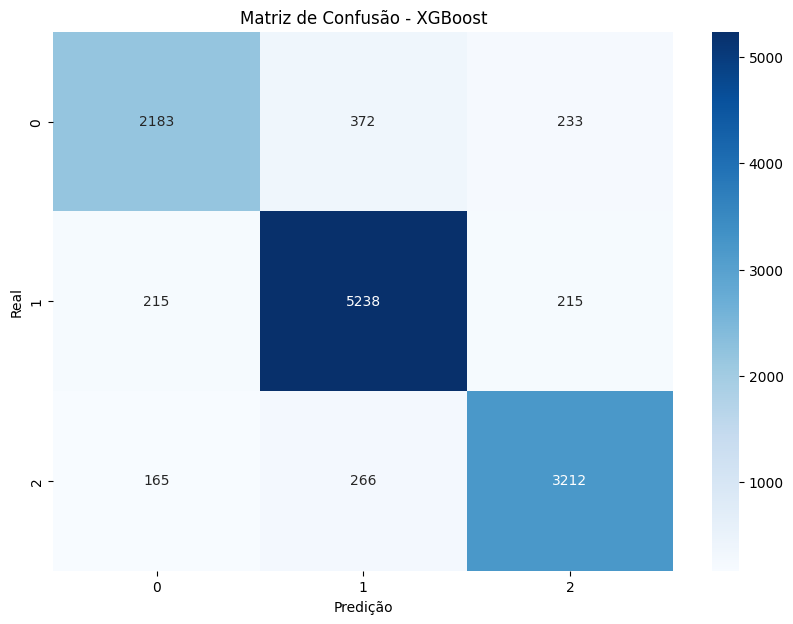

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treinar o modelo (usando o melhor modelo encontrado, aqui assumindo que 'best_xgb_model' já está treinado)
# Caso ainda não tenha feito isso, você pode precisar treinar seu modelo com os dados de treinamento
# Por exemplo: best_xgb_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

# Gerar o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_xgb))

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


## Conclusão e Análise dos Resultados

Neste projeto, foi realizado um estudo sobre a previsão de resultados de partidas da Premier League utilizando técnicas de aprendizado de máquina. Através da análise dos dados e da aplicação de diferentes modelos, consegui obter insights valiosos e alcançar um desempenho satisfatório.

### Principais Resultados:

1. **Modelos Avaliados**:
   - Implementei e avaliei diferentes algoritmos, incluindo Random Forest e XGBoost.
   - O modelo XGBoost apresentou a melhor acurácia, alcançando um desempenho de **0.8788** no conjunto de teste.

2. **Validação do Modelo**:
   - Utilizei a validação cruzada e GridSearchCV para otimizar hiperparâmetros e garantir que o modelo não estivesse apenas se ajustando aos dados de treinamento.
   - A matriz de confusão e o relatório de classificação mostraram que, apesar de um desempenho geral bom, algumas classes apresentaram dificuldades de previsão, o que pode ser um indicativo de que o modelo pode ser aprimorado.

3. **Considerações sobre Overfitting**:
   - Embora os resultados sejam promissores, é importante monitorar o overfitting.
   - A diferença entre a acurácia do conjunto de treinamento e do conjunto de teste deve ser analisada. Se a acurácia no conjunto de treinamento for significativamente maior, pode ser necessário ajustar o modelo ou usar técnicas de regularização.

### Reflexão Final:
Este projeto não apenas aprimorou minhas habilidades em ciência de dados e aprendizado de máquina. Estou ansioso para aplicar esses conhecimentos em projetos futuros.

